In [354]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
%matplotlib inline
import tensorflow as tf
import random
from pprint import pprint
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder

from numpy import array
from numpy import argmax
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder 


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import svm

# Multilayer Perceptron
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
visible = Input(shape=(10,))
hidden1 = Dense(10, activation='relu')(visible)
hidden2 = Dense(20, activation='relu')(hidden1)
hidden3 = Dense(10, activation='relu')(hidden2)
output = Dense(1, activation='sigmoid')(hidden3)
model = Model(inputs=visible, outputs=output)
# summarize layers
print(model.summary())
# plot graph
plot_model(model, to_file='multilayer_perceptron_graph.png')

# Multilayer Perceptron
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt



Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 10)]              0         
_________________________________________________________________
dense_127 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_128 (Dense)            (None, 20)                220       
_________________________________________________________________
dense_129 (Dense)            (None, 10)                210       
_________________________________________________________________
dense_130 (Dense)            (None, 1)                 11        
Total params: 551
Trainable params: 551
Non-trainable params: 0
_________________________________________________________________
None
Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


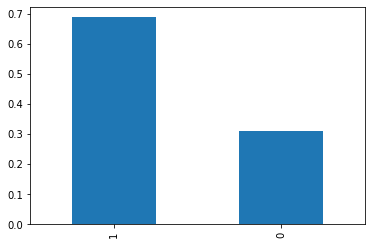

In [229]:
studentStatus = df.label.value_counts(normalize=True)
studentStatus.plot(kind="bar")


In [351]:
df = pd.read_csv("./Placement_Data_Full_Class.csv")
df = df.drop("salary", axis=1)
df["label"] = df.status
df = df.drop("status", axis=1)
df = df.drop("sl_no", axis=1)
column_names = []
for column in df:
    name = column.replace("_", " ")
    column_names.append(name)
df.columns = column_names

le = LabelEncoder()
category = [column for column in df]
print([column for column in df])
for col in [column for column in df]:
    #data = array(df[col])
    if(col=="ssc p" or col=="hsc p" or col =="degree p" or col == "etest p" or col=="mba p"):
        norm_data = tf.keras.utils.normalize(array(df[col]), axis=-1, order=2)
        temp = pd.DataFrame({col: norm_data[0]})
        df[col] = temp[col]
     
        
#male=1,female=0
df["gender"] = le.fit_transform(df["gender"])
#1 other,0 central
df["ssc b"] = le.fit_transform(df["ssc b"])
#1 other,0 central
df["hsc b"] = le.fit_transform(df["hsc b"])
#commerce 1, science 2, art 0
df["hsc s"] = le.fit_transform(df["hsc s"])
#Sci&Tech 2,Comm&Mgmt 0,Others 1
df["degree t"] = le.fit_transform(df["degree t"])
#yes 1, no 0
df["workex"] = le.fit_transform(df["workex"])
#Mkt&HR 1,Mkt&Fin 0
df["specialisation"] = le.fit_transform(df["specialisation"])
df['label']=le.fit_transform(df["label"])
print(df)

df.head()
# shuffle the dataset
np.random.shuffle(np.array(df))

#Select important features
#df = SelectKBest(chi2, k=20).fit_transform(X, y)
# get the label
label = df.label
label = np.array(label)
# get the training data
data = df.drop("label",axis=1)
data = np.array(data)

#newdata = SelectKBest(chi2, k=2).fit_transform(data, label)
#print("newdata",newdata)

print("training data",data.shape, "data label",label.shape)



['gender', 'ssc p', 'ssc b', 'hsc p', 'hsc b', 'hsc s', 'degree p', 'degree t', 'workex', 'etest p', 'specialisation', 'mba p', 'label']
     gender     ssc p  ssc b     hsc p  hsc b  hsc s  degree p  degree t  \
0         1  0.067034      1  0.092328      1      1  0.059237         2   
1         1  0.079370      0  0.079473      1      2  0.079133         2   
2         1  0.065033      0  0.068993      0      0  0.065365         0   
3         1  0.056029      0  0.052759      0      2  0.053109         2   
4         1  0.085844      0  0.074674      0      1  0.074864         0   
..      ...       ...    ...       ...    ...    ...       ...       ...   
210       1  0.080641      1  0.083197      1      1  0.079255         0   
211       1  0.058030      1  0.060876      1      2  0.073536         2   
212       1  0.067034      1  0.067978      1      1  0.074557         0   
213       0  0.074038      1  0.066963      1      1  0.059237         0   
214       1  0.062032      

In [315]:
xTrain, xTest, yTrain, yTest = train_test_split(data, label, test_size = 0.1, random_state = 0)
print("xtrain",xTrain, xTrain.shape)
print("xtest",xTest)
print("yTrain",yTrain)
print("yTest",yTest)


xtrain [[1.         0.06203157 0.         ... 0.06233183 0.         0.06159257]
 [0.         0.06403259 1.         ... 0.04651629 0.         0.06814544]
 [1.         0.05202648 1.         ... 0.05581955 0.         0.06380594]
 ...
 [1.         0.0770392  1.         ... 0.07442607 0.         0.07310643]
 [1.         0.06303208 0.         ... 0.07256542 0.         0.05947734]
 [1.         0.07303717 1.         ... 0.07814737 1.         0.05739482]] (193, 12)
xtest [[0.         0.06703411 0.         0.0710218  0.         1.
  0.06638657 1.         0.         0.08186868 1.         0.07845993]
 [0.         0.07904022 0.         0.07710938 0.         2.
  0.06699937 2.         0.         0.0539589  1.         0.06048044]
 [0.         0.08404277 1.         0.07609478 1.         2.
  0.0704719  2.         1.         0.0576802  1.         0.06799279]
 [0.         0.04802444 0.         0.05174445 0.         1.
  0.05923725 0.         1.         0.05581955 1.         0.06410033]
 [1.         0.08

In [198]:
tree = DecisionTreeClassifier()

In [199]:
tree.fit(xTrain,yTrain)
y_pred = tree.predict(xTest)


In [200]:
print("Accuracy:",metrics.accuracy_score(yTest, y_pred))


Accuracy: 0.7272727272727273


In [374]:
#Random Forest 
randomForest=RandomForestClassifier(n_estimators=64)


In [375]:
randomForest.fit(xTrain,yTrain)


RandomForestClassifier(n_estimators=64)

In [376]:
y_pred=randomForest.predict(xTest)
print("y_pred",y_pred)
print("yTest",yTest)

y_pred [1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1]
yTest [0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 0]


In [377]:
print("Random forest Accuracy:",metrics.accuracy_score(yTest, y_pred))


Random forest Accuracy: 0.6818181818181818


In [384]:
#Multiple perceptron 
model = Sequential()
model.add(Dense(9,  activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])



In [385]:
# Train the model
#model.fit(xTrain,yTrain, verbose=1, batch_size=5, epochs=10000)
model.fit(xTrain, yTrain, epochs=1000, batch_size=32, validation_split=0.1, verbose=1)



Epoch 1/1000

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

6/6 [==============================] - 0s 16ms/step - loss: 0.2922 - accuracy: 0.3237 - val_loss: 0.3123 - val_accuracy: 0.1500
Epoch 2/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.2855 - accuracy: 0.3179 - val_loss: 0.3017 - val_accuracy: 0.2500
Epoch 3/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.2791 - accuracy: 0.3699 - val_loss: 0.2919 - val_accuracy: 0.2500
Epoch 4/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.2738 - accura

In [387]:
#evaluate the data set.
predictTesting = model.predict_classes(xTest)


print("Testing dataset confusion matrix: \n", confusion_matrix(yTest, predictTesting))
print('Testing dataset Accuracy Score: \n', accuracy_score(yTest, predictTesting))
print('Testing dataset Report : \n',classification_report(yTest, predictTesting))


Testing dataset confusion matrix: 
 [[ 5  3]
 [ 3 11]]
Testing dataset Accuracy Score: 
 0.7272727272727273
Testing dataset Report : 
               precision    recall  f1-score   support

           0       0.62      0.62      0.62         8
           1       0.79      0.79      0.79        14

    accuracy                           0.73        22
   macro avg       0.71      0.71      0.71        22
weighted avg       0.73      0.73      0.73        22



In [353]:
#KNN
knn= KNeighborsClassifier()
knn.fit(xTrain,yTrain)
prediction = knn.predict(xTest)
print('With KNN accuracy is: ',nb.score(xTest,yTest))


With KNN accuracy is:  0.7272727272727273


In [232]:
nb = GaussianNB()
nb.fit(xTrain,yTrain)
prediction = nb.predict(xTest)
print('With Gaussian  accuracy is: ',nb.score(xTest,yTest)) 

With Gaussian  accuracy is:  0.7272727272727273


In [346]:
#Support vector machine
clf = svm.SVC(kernel='poly',degree=12)
clf.fit(xTrain, yTrain)

SVC(degree=12, kernel='poly')

In [340]:
res=np.array([])
for data in xTest:
    pred = clf.predict([data])
    pred=np.array(pred)
    res = np.concatenate((res,pred))
    print("pred",pred)
print("Testing dataset confusion matrix: \n", confusion_matrix(yTest, res))
print('Testing dataset Accuracy Score: \n', accuracy_score(yTest, res))
print('Testing dataset Report : \n',classification_report(yTest, res))

pred [1]
pred [1]
pred [1]
pred [1]
pred [1]
pred [1]
pred [1]
pred [1]
pred [1]
pred [1]
pred [1]
pred [1]
pred [1]
pred [1]
pred [1]
pred [1]
pred [1]
pred [1]
pred [0]
pred [1]
pred [0]
pred [0]
Testing dataset confusion matrix: 
 [[ 2  6]
 [ 1 13]]
Testing dataset Accuracy Score: 
 0.6818181818181818
Testing dataset Report : 
               precision    recall  f1-score   support

           0       0.67      0.25      0.36         8
           1       0.68      0.93      0.79        14

    accuracy                           0.68        22
   macro avg       0.68      0.59      0.58        22
weighted avg       0.68      0.68      0.63        22



In [392]:
tree_scores = cross_val_score(tree, xTrain,yTrain, cv=10, scoring='accuracy')
print("tree",tree_scores)
print("tree Accuracy: %0.2f (+/- %0.2f)" % (tree_scores.mean(), tree_scores.std() * 2))

forest_scores = cross_val_score(randomForest, xTrain,yTrain, cv=10, scoring='accuracy')
print("randomForest",forest_scores)
print("randomForest Accuracy: %0.2f (+/- %0.2f)" % (forest_scores.mean(), forest_scores.std() * 2))

knn_scores = cross_val_score(knn, xTrain,yTrain, cv=10, scoring='accuracy')
print("KNN",knn_scores)
print("KNN Accuracy: %0.2f (+/- %0.2f)" % (knn_scores.mean(), knn_scores.std() * 2))


nb_scores = cross_val_score(nb, xTrain,yTrain, cv=10, scoring='accuracy')
print("Gaussian",nb_scores)
print("Gaussian Accuracy: %0.2f (+/- %0.2f)" % (nb_scores.mean(), nb_scores.std() * 2))



SVC_scores = cross_val_score(clf, xTrain,yTrain, cv=10, scoring='accuracy')
print("SVC",scores)
print("SVC Accuracy: %0.2f (+/- %0.2f)" % (SVC_scores.mean(), SVC_scores.std() * 2))

tree [0.75       0.85       0.8        0.84210526 0.78947368 0.78947368
 0.84210526 0.73684211 0.68421053 0.68421053]
tree Accuracy: 0.78 (+/- 0.12)
randomForest [0.75       0.95       0.95       0.89473684 0.84210526 0.89473684
 1.         0.84210526 0.73684211 0.78947368]
randomForest Accuracy: 0.86 (+/- 0.17)
KNN [0.65       0.75       0.75       0.78947368 0.73684211 0.84210526
 0.68421053 0.84210526 0.68421053 0.68421053]
KNN Accuracy: 0.74 (+/- 0.13)
Gaussian [0.75       0.9        0.85       0.73684211 0.78947368 0.89473684
 0.94736842 0.89473684 0.78947368 0.78947368]
Gaussian Accuracy: 0.83 (+/- 0.14)
SVC [0.7        0.65       0.7        0.63157895 0.68421053 0.68421053
 0.57894737 0.73684211 0.63157895 0.78947368]
SVC Accuracy: 0.68 (+/- 0.11)


In [393]:
# Create lists for the plot
methods = ['tree', 'randomForest', 'knn','gaussian','SVC']
x_pos = np.arange(len(methods))
mean = [tree_scores.mean(), forest_scores.mean(), knn_scores.mean(),nb_scores.mean(),SVC_scores.mean()]
error = [tree_scores.std(),  forest_scores.std(), knn_scores.std(),nb_scores.std(),SVC_scores.std()]

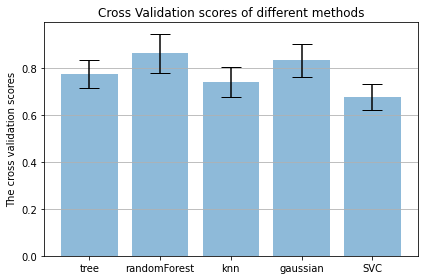

In [394]:
fig, ax = plt.subplots()
ax.bar(x_pos, mean, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('The cross validation scores')
ax.set_xticks(x_pos)
ax.set_xticklabels(methods)
ax.set_title('Cross Validation scores of different methods')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.show()